<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Clustering_Toko_Yang_Tutup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopy
from sklearn import preprocessing,cluster
import scipy

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/master/machine_learning/data_stores.csv')
data.columns.tolist()

['Brand',
 'Store Number',
 'Store Name',
 'Ownership Type',
 'Street Address',
 'City',
 'State/Province',
 'Country',
 'Postcode',
 'Phone Number',
 'Timezone',
 'Longitude',
 'Latitude']

In [ ]:
filter='Las Vegas'
data=data[data['City']==filter][['City','Street Address','Longitude','Latitude']].reset_index(drop=True)
data=data.reset_index().rename(columns={'index':'id'})
data.head()

,id,City,Street Address,Longitude,Latitude
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11


In [ ]:
data['Potential']=np.random.randint(low=3,high=10+1,size=len(data))
data['Staff']=data['Potential'].apply(lambda x:int(np.random.rand()*x)+1)
data['Capacity']=data['Potential']-data['Staff']
data["Cost"]=np.random.choice(['high','medium','low'],size=len(data),p=[0.4,0.5,0.1])
data.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12,7,6,1,low
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04,3,2,1,high
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13,8,2,6,high
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22,3,3,0,high
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11,10,2,8,medium


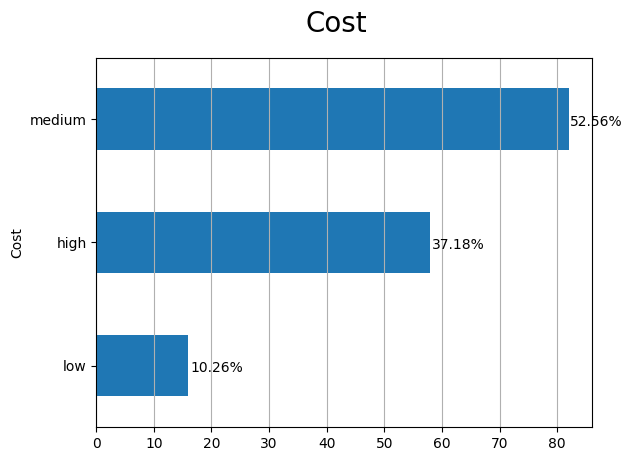

In [ ]:
x = "Cost"
ax = data[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()


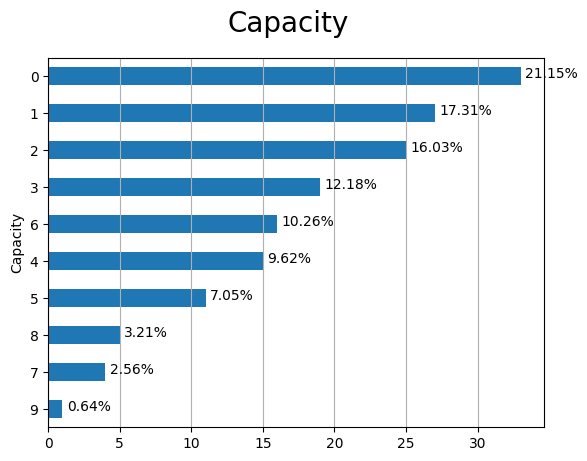

In [ ]:
x = "Capacity"
ax = data[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()


In [ ]:
city='Las Vegas'
locator=geopy.geocoders.Nominatim(user_agent='MyCoder')
location=locator.geocode(city)
print(location)
location=[location.latitude,location.longitude]
print('[Lat,Long]:', location)

Las Vegas, Clark County, Nevada, United States
[Lat,Long]: [36.1672559, -115.148516]


In [ ]:
x, y = "Latitude", "Longitude"
color = "Cost"
size = "Staff"
popup = "Street Address"
data = data.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(data[color].unique()))
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

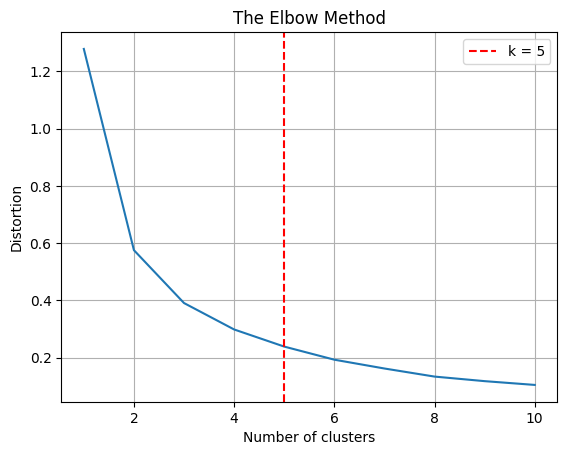

In [ ]:
X=data[['Latitude','Longitude']]
max_k=10
distortions=[]
for i in range(1,max_k+1):
  if len(X)>=i:
    model=cluster.KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
k = 5
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = data[["Latitude","Longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
data[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
data.sample(5)

<ipython-input-24-66976dcdde46>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dtf_X["centroids"].iloc[i] = 1
<ipython-input-24-66976dcdde46>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,color,size,cluster,centroids
145,145,Las Vegas,3700 W Flamingo Rd,-115.19,36.12,3,1,2,medium,orange,3.000000,0,0
123,123,Las Vegas,3900 Las Vegas Blvd,-115.18,36.09,6,2,4,medium,orange,4.333333,0,0
25,25,Las Vegas,2211 N Rampart Blvd,-115.28,36.20,9,3,6,medium,orange,5.666667,1,0
67,67,Las Vegas,"591 N. Eastern Ave., 110",-115.12,36.17,7,6,1,low,green,9.666667,0,0
79,79,Las Vegas,5757 Wayne Newton Blvd,-115.15,36.08,6,4,2,low,green,7.000000,3,0


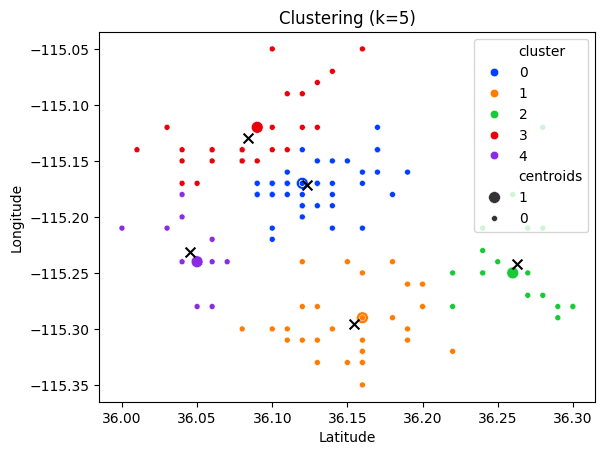

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=data,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black',
           marker="x")

In [ ]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Staff"
popup = "Street Address"
marker = "centroids"
data = data.copy()
## create color column
lst_elements = sorted(list(data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(data[marker].unique()))
data[data[marker]==1].apply(lambda row:
           folium.Marker(location=[row[x],row[y]],
           popup=row[marker], draggable=False,
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

In [ ]:
dtf_new = pd.DataFrame()
for c in sorted(data["cluster"].unique()):
    dtf_cluster = data[data["cluster"]==c]

    ## hubs and targets
    lst_hubs = dtf_cluster[dtf_cluster["Cost"]=="low"
               ].sort_values("Capacity").to_dict("records")
    lst_targets = dtf_cluster[dtf_cluster["Cost"]=="high"
               ].sort_values("Staff").to_dict("records")
    ## move targets
    for target in lst_targets:
         for hub in lst_hubs:
             ### if hub has space
             if hub["Capacity"] > 0:
                residuals = hub["Capacity"] - target["Staff"]
                #### case of hub has still capacity: do next target
                if residuals >= 0:
                   hub["Staff"] += target["Staff"]
                   hub["Capacity"] = hub["Potential"] - hub["Staff"]
                   target["Capacity"] = target["Potential"]
                   target["Staff"] = 0
                   break
                #### case of hub is full: do next hub
                else:
                   hub["Capacity"] = 0
                   hub["Staff"] = hub["Potential"]
                   target["Staff"] = -residuals
                   target["Capacity"] = target["Potential"] - target["Staff"]
    # Use pd.concat instead of append
    dtf_new = pd.concat([dtf_new, pd.DataFrame(lst_hubs), pd.DataFrame(lst_targets)], ignore_index=True)
# Use pd.concat instead of append
dtf_new = pd.concat([dtf_new, data[data["Cost"]=="medium"]], ignore_index=True).sort_values(["cluster","Staff"])
dtf_new.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,color,size,cluster,centroids
7,70,Las Vegas,340 E Flamingo Rd,-115.16,36.11,5,0,5,high,#13503D,3.0,0,0
8,134,Las Vegas,"855 South Grand Central Parkway, Francisco Center",-115.16,36.17,4,0,4,high,#13503D,3.0,0,0
9,10,Las Vegas,3570 Las Vegas Blvd S,-115.17,36.11,3,0,3,high,#13503D,3.0,0,0
10,15,Las Vegas,129 East Freemont St.,-115.14,36.17,4,0,4,high,#13503D,3.0,0,0
11,32,Las Vegas,3545 Las Vegas Blvd S,-115.17,36.12,8,0,8,high,#13503D,3.0,0,0


In [ ]:
dtf_new["closed"] = dtf_new["Staff"].apply(lambda x: 1
                                           if x==0 else 0)
print("closed:", dtf_new["closed"].sum())

closed: 22


In [ ]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Staff"
popup = "Street Address"
marker = "centroids"
data = dtf_new.copy()
## create color column
lst_elements = sorted(list(data[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(data[marker].unique()))
data[data[marker]==1].apply(lambda row:
           folium.Marker(location=[row[x],row[y]],
           popup=row[marker], draggable=False,
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_